In [1]:
import sys
sys.path.append('..')

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from core.dataset import *
from core.utils import *

In [3]:
path = 'D:/Data/hoffmanlab/featureselection/data/'

## Polarization state classification on just CpG

In [4]:
ligands = ['CpG_am']
polarizations = ['', 'i0', 'i3', 'i4', 'ib', 'ig']

In [5]:
data = PolarData(path, ligands, polarizations, merge=True)

In [6]:
model = xgb.XGBClassifier(use_label_encoder=False, tree_method='gpu_hist')

In [7]:
X, labels = data.iloc[:, [i for i in range(984)]].to_numpy(), data.iloc[:, [984]].to_numpy().reshape(-1, )

In [8]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, labels, test_size=0.1)

In [9]:
model.fit(X_train, y_train)

[14:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [10]:
pred = model.predict(X_val)

In [11]:
cr = sklearn.metrics.classification_report(pred, y_val, target_names=polarizations) # blank is the unstimulated

In [12]:
print(cr)

              precision    recall  f1-score   support

                   0.67      0.53      0.59       268
          i0       0.30      0.38      0.34        77
          i3       0.21      0.40      0.27        53
          i4       0.47      0.50      0.48        70
          ib       0.62      0.60      0.61       174
          ig       0.63      0.59      0.61       154

    accuracy                           0.53       796
   macro avg       0.48      0.50      0.48       796
weighted avg       0.57      0.53      0.54       796



## Holistic polarization state classification

In [13]:
ligands = ['CpG_am', 'FLA_am', 'FSL_am', 'LPS_am', 'P3K_am', 'PIC_am', 'R84_am', 'TNF_am']
polarizations = ['', 'i0', 'i3', 'i4', 'ib', 'ig']

In [14]:
data = PolarData(path, ligands, polarizations, merge=True)

In [15]:
data = data.iloc[:, [i for i in range(985)]]

In [16]:
X, labels = data.iloc[:, [i for i in range(984)]].to_numpy(), data.iloc[:, [984]].to_numpy().reshape(-1, )

In [17]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, labels, test_size=0.1)

In [18]:
model = xgb.XGBClassifier(use_label_encoder=False, tree_method='gpu_hist')

In [19]:
model.fit(X_train, y_train)

[14:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [20]:
pred = model.predict(X_val)

In [21]:
cr = sklearn.metrics.classification_report(pred, y_val, target_names=polarizations)

In [22]:
print(cr)

              precision    recall  f1-score   support

                   0.45      0.41      0.43      1621
          i0       0.39      0.44      0.41       988
          i3       0.38      0.39      0.38       965
          i4       0.47      0.50      0.49       872
          ib       0.49      0.49      0.49      1035
          ig       0.49      0.48      0.48      1325

    accuracy                           0.45      6806
   macro avg       0.44      0.45      0.45      6806
weighted avg       0.45      0.45      0.45      6806



In [48]:
argsort = model.feature_importances_.argsort()[::-1] # highest to lowest

<AxesSubplot:>

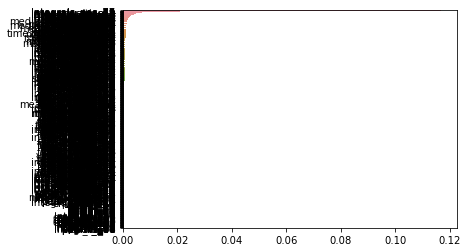

In [49]:
# most features seem to have 0 importance for distinguishing polarization states
sns.barplot(x=model.feature_importances_[argsort], y=features.columns[argsort])

<AxesSubplot:>

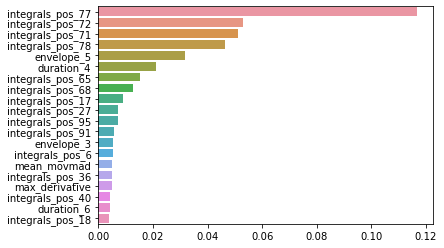

In [50]:
sns.barplot(x=model.feature_importances_[argsort][:20], y=features.columns[argsort][:20])

## Threshold analysis for Polarization State Classification

In [54]:
# parameters
epochs = 20
feature_list = ['integrals_pos_77', 'integrals_pos_72', 'integrals_pos_71', 'integrals_pos_78', 'envelope_5', 'duration_4', 'integrals_pos_65', 'integrals_pos_68',
                'integrals_pos_17', 'integrals_pos_27', 'integrals_pos_95', 'integrals_pos_91', 'envelope_3', 'integrals_pos_6', 'mean_movmad', 'integrals_pos_36',
                'max_derivative', 'integrals_pos_40', 'duration_6', 'integrals_pos_18']
dataset = data # already initialized
target_names = polarizations
n = len(feature_list)

In [55]:
crs = []
static_percent_res = []
seq_percent_res = []

for e in range(epochs):
    dat = feature_list[:(n-e)] # discard last entry of the feature list per epoch
    print(f'\nNumber of features: {n - e}')
    cr = one_fit(dat, dataset, target_names, random_state=100, verbose=True, ret=True)
    
    if e != 0: 
        static_residual = cr.iloc[8, 2] / crs[0].iloc[8, 2]
        percent_residual = cr.iloc[8, 2] / crs[-1].iloc[8, 2] # where iloc[8, 2] is the weighted avg f1-score
        
        print(f'Static Percentange Residual {static_residual}')
        print(f'Sequential Percentage Residual: {percent_residual}')
        
        static_percent_res.append(static_residual)
        seq_percent_res.append(percent_residual)
        
    crs.append(cr)


Number of features: 20
[14:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score      support
               0.338692  0.446643  0.385248  1415.000000
i0             0.354045  0.264217  0.302605  1143.000000
i3             0.289628  0.289912  0.289770  1021.000000
i4             0.418203  0.397590  0.407636   913.000000
ib             0.385428  0.361386  0.373020  1010.000000
ig             0.445600  0.427147  0.436179  1304.000000
accuracy       0.369527  0.369527  0.369527     0.369527
macro avg      0.371933  0.364483  0.365743  6806.000000
weighted avg   0.371995  0.369527  0.367993  6806.000000

Number of features: 19
[14:40:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rele

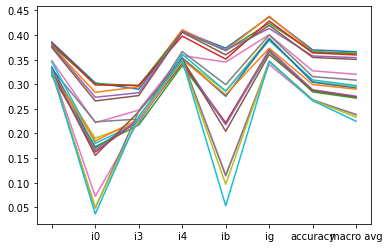

In [56]:
for i in crs:
    plt.plot(i.iloc[:8, 2])

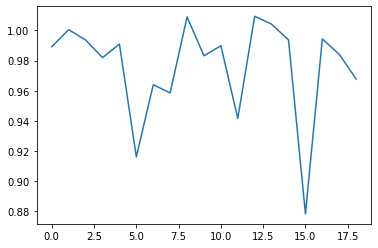

In [59]:
# sequential percentage residuals
plt.plot(seq_percent_res)

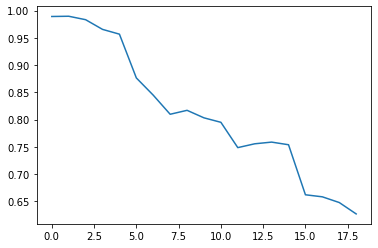

In [60]:
# static percentage residuals
plt.plot(static_percent_res)

### Feature dimensionality threshold ~ 15

### Individual ligand feature importances for polarization classification

In [ ]:
ligands = ['CpG_am', 'FLA_am', 'FSL_am', 'LPS_am', 'P3K_am', 'PIC_am', 'R84_am', 'TNF_am']

In [64]:
d = {}
for i in ligands:
    ligand_data = PolarData(path, [i], polarizations, merge=True)
    X, y = ligand_data.iloc[:, [i for i in range(984)]].to_numpy(), ligand_data.iloc[:, [984]].to_numpy().reshape(-1, )
    X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.1, random_state=42)
    model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # metrics
    cr = sklearn.metrics.classification_report(y_val, y_pred, target_names=polarizations)
    argsort = model.feature_importances_.argsort()
    f_imp = model.feature_importances_[argsort]
    f_sorted = features.columns[argsort]
    
    # save into dictionary
    d[i] = [cr, argsort, f_imp, f_sorted]

[14:53:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

C:\Users\minha\miniconda3\envs\peep\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\minha\miniconda3\envs\peep\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\minha\miniconda3\envs\peep\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[14:54:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:55:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

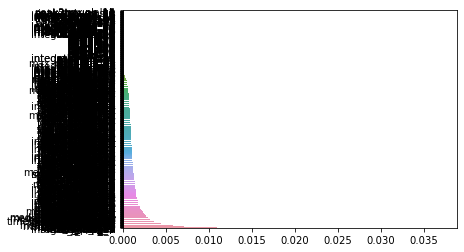

In [76]:
sns.barplot(x=feature_weights, y=feature_names)

## CpG

              precision    recall  f1-score   support

                   0.52      0.71      0.60       204
          i0       0.58      0.40      0.48       107
          i3       0.37      0.26      0.30       112
          i4       0.54      0.59      0.56        61
          ib       0.58      0.57      0.58       146
          ig       0.63      0.60      0.61       166

    accuracy                           0.55       796
   macro avg       0.54      0.52      0.52       796
weighted avg       0.54      0.55      0.54       796

Top 15 most important features:
Index(['envelope_5', 'integrals_pos_83', 'integrals_57', 'mean_movmad',
       'valley_amps_4', 'mean_movstd', 'pk2_amp', 'integrals_48',
       'envelope_14', 'time_series_10', 'integrals_pos_26', 'integrals_pos_11',
       'integrals_pos_46', 'valley_amps_5', 'time_series_41'],
      dtype='object')


<AxesSubplot:>

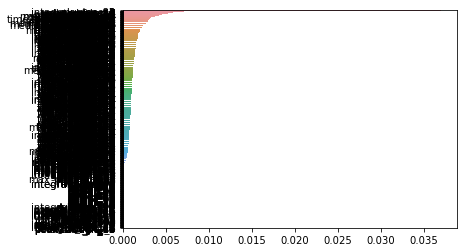

In [81]:
print(d['CpG_am'][0])
print(f'Top 15 most important features:\n{d["CpG_am"][3][::-1][:15]}')
sns.barplot(x=d['CpG_am'][2][::-1], y=d['CpG_am'][3][::-1])

## FLA

              precision    recall  f1-score   support

                   0.52      0.42      0.46       156
          i0       0.61      0.72      0.66       160
          i3       0.52      0.49      0.50       102
          i4       0.48      0.49      0.48       105
          ib       0.53      0.49      0.51       115
          ig       0.56      0.61      0.59       178

    accuracy                           0.55       816
   macro avg       0.54      0.54      0.53       816
weighted avg       0.54      0.55      0.54       816

Top 15 most important features:
Index(['integrals_pos_64', 'duration_3', 'integrals_pos_15',
       'integrals_pos_13', 'integrals_71', 'median_peak_amp',
       'mean_peak2trough', 'integrals_40', 'envelope_5', 'fold_change_63',
       'mean_movvar', 'integrals_79', 'integrals_5', 'duration_6',
       'integrals_94'],
      dtype='object')


<AxesSubplot:>

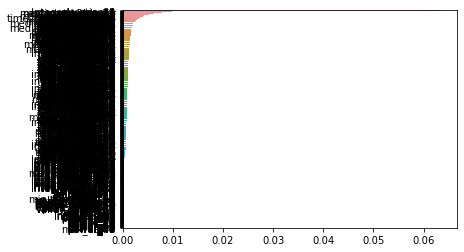

In [82]:
print(d['FLA_am'][0])
print(f'Top 15 most important features:\n{d["FLA_am"][3][::-1][:15]}')
sns.barplot(x=d['FLA_am'][2][::-1], y=d['FLA_am'][3][::-1])

## FSL

              precision    recall  f1-score   support

                   0.57      0.69      0.63       196
          i0       0.44      0.27      0.33        94
          i3       0.28      0.13      0.18        98
          i4       0.52      0.63      0.57       121
          ib       0.69      0.55      0.61        84
          ig       0.53      0.64      0.58       176

    accuracy                           0.53       769
   macro avg       0.50      0.49      0.48       769
weighted avg       0.51      0.53      0.51       769

Top 15 most important features:
Index(['integrals_pos_15', 'integrals_pos_13', 'integrals_pos_19',
       'integrals_pos_22', 'envelope_7', 'envelope_3', 'mean_movvar',
       'integrals_pos_57', 'time_series_9', 'integrals_8', 'integrals_pos_84',
       'valley_amps_5', 'integrals_95', 'noise_est', 'valley_amps_6'],
      dtype='object')


<AxesSubplot:>

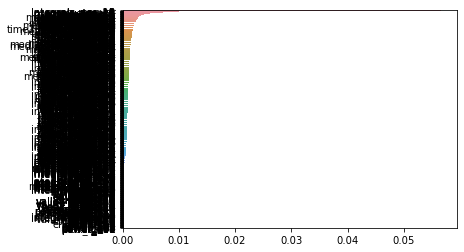

In [83]:
print(d['FSL_am'][0])
print(f'Top 15 most important features:\n{d["FSL_am"][3][::-1][:15]}')
sns.barplot(x=d['FSL_am'][2][::-1], y=d['FSL_am'][3][::-1])

## LPS

              precision    recall  f1-score   support

                   0.62      0.66      0.64       180
          i0       0.62      0.56      0.59       178
          i3       0.44      0.45      0.44       130
          i4       1.00      1.00      1.00        57
          ib       0.61      0.55      0.58       114
          ig       0.65      0.71      0.68       199

    accuracy                           0.63       858
   macro avg       0.66      0.65      0.66       858
weighted avg       0.63      0.63      0.62       858

Top 15 most important features:
Index(['power_119', 'envelope_5', 'integrals_pos_39', 'envelope_4',
       'integrals_pos_9', 'duration_5', 'integrals_pos_7', 'integrals_10',
       'integrals_17', 'integrals_pos_11', 'integrals_pos_12',
       'fold_change_80', 'mean_movstd', 'mean_movmad', 'fold_change_67'],
      dtype='object')


<AxesSubplot:>

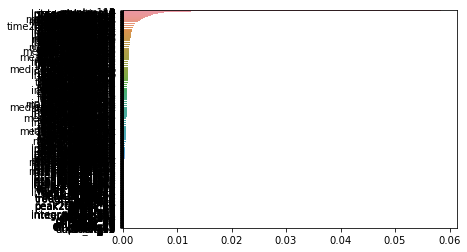

In [84]:
print(d['LPS_am'][0])
print(f'Top 15 most important features:\n{d["LPS_am"][3][::-1][:15]}')
sns.barplot(x=d['LPS_am'][2][::-1], y=d['LPS_am'][3][::-1])

## P3K

              precision    recall  f1-score   support

                   0.61      0.70      0.65       169
          i0       0.55      1.00      0.71        73
          i3       0.70      0.69      0.69       100
          i4       0.00      0.00      0.00        59
          ib       0.65      0.62      0.64        82
          ig       0.63      0.48      0.55        97

    accuracy                           0.62       580
   macro avg       0.52      0.58      0.54       580
weighted avg       0.56      0.62      0.58       580

Top 15 most important features:
Index(['duration_4', 'median_peak_amp', 'integrals_pos_35', 'time_series_1',
       'integrals_pos_31', 'median_trough2peak', 'envelope_2', 'mean_movstd',
       'envelope_4', 'fold_change_3', 'valley_amps_2', 'peak2rms',
       'envelope_1', 'integrals_pos_15', 'integrals_25'],
      dtype='object')


<AxesSubplot:>

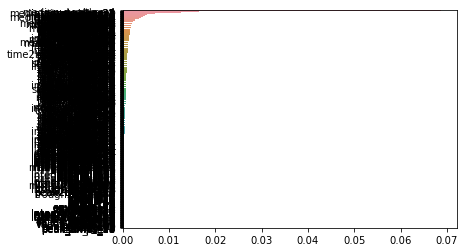

In [85]:
print(d['P3K_am'][0])
print(f'Top 15 most important features:\n{d["P3K_am"][3][::-1][:15]}')
sns.barplot(x=d['P3K_am'][2][::-1], y=d['P3K_am'][3][::-1])

## PIC

              precision    recall  f1-score   support

                   0.61      0.49      0.55       140
          i0       0.59      0.45      0.51       140
          i3       0.44      0.48      0.46       206
          i4       0.45      0.50      0.47       182
          ib       0.47      0.59      0.52       149
          ig       0.67      0.59      0.63       145

    accuracy                           0.52       962
   macro avg       0.54      0.52      0.52       962
weighted avg       0.53      0.52      0.52       962

Top 15 most important features:
Index(['integrals_pos_40', 'integrals_pos_33', 'integrals_pos_47', 'intwin1_2',
       'time_series_13', 'integrals_pos_34', 'integrals_pos_45',
       'std_peak_amp', 'fold_change_18', 'fold_change_20', 'fold_change_17',
       'envelope_4', 'integrals_pos_31', 'time_series_14', 'fold_change_19'],
      dtype='object')


<AxesSubplot:>

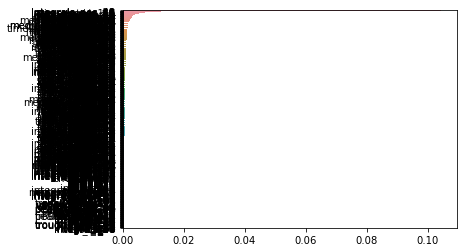

In [86]:
print(d['PIC_am'][0])
print(f'Top 15 most important features:\n{d["PIC_am"][3][::-1][:15]}')
sns.barplot(x=d['PIC_am'][2][::-1], y=d['PIC_am'][3][::-1])

## R84

              precision    recall  f1-score   support

                   0.53      0.57      0.55       271
          i0       0.52      0.38      0.44       203
          i3       0.52      0.49      0.51       144
          i4       0.54      0.47      0.50       124
          ib       0.57      0.51      0.54       140
          ig       0.55      0.69      0.61       270

    accuracy                           0.54      1152
   macro avg       0.54      0.52      0.53      1152
weighted avg       0.54      0.54      0.53      1152

Top 15 most important features:
Index(['integrals_pos_24', 'integrals_pos_88', 'peak2rms', 'oscpower',
       'mean_trough2peak', 'mean_peak2trough', 'integrals_pos_20',
       'integrals_10', 'valley_amps_3', 'peak_amps_4', 'integrals_pos_17',
       'fold_change_2', 'duration_2', 'median_peak2trough', 'min_derivative'],
      dtype='object')


<AxesSubplot:>

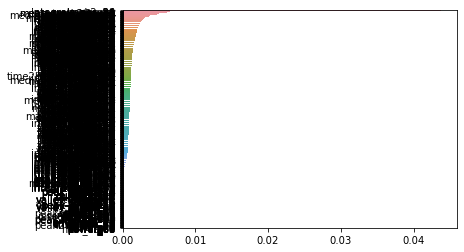

In [87]:
print(d['R84_am'][0])
print(f'Top 15 most important features:\n{d["R84_am"][3][::-1][:15]}')
sns.barplot(x=d['R84_am'][2][::-1], y=d['R84_am'][3][::-1])

## TNF

              precision    recall  f1-score   support

                   0.46      0.44      0.45       167
          i0       0.42      0.50      0.46       169
          i3       0.29      0.29      0.29       103
          i4       0.45      0.39      0.41       145
          ib       0.67      0.70      0.68       151
          ig       0.54      0.48      0.51       141

    accuracy                           0.48       876
   macro avg       0.47      0.47      0.47       876
weighted avg       0.48      0.48      0.48       876

Top 15 most important features:
Index(['mean_movvar', 'time_series_3', 'std_peak2trough', 'fold_change_3',
       'cv_peak2trough', 'integrals_32', 'max_pk1_speed', 'duration_9',
       'oscbandwidth', 'peak_times_1', 'time_series_4', 'psd_2',
       'integrals_55', 'integrals_pos_90', 'duration_16'],
      dtype='object')


<AxesSubplot:>

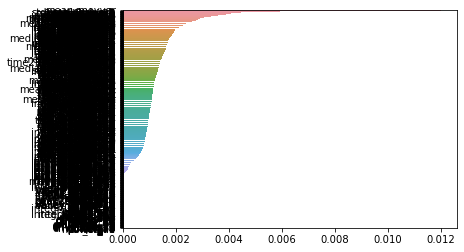

In [88]:
print(d['TNF_am'][0])
print(f'Top 15 most important features:\n{d["TNF_am"][3][::-1][:15]}')
sns.barplot(x=d['TNF_am'][2][::-1], y=d['TNF_am'][3][::-1])

In [89]:
# top features from each ligand
top_features = ['integrals_pos_15', 'integrals_pos_64', 'integrals_pos_13', 'power_119', 'duration_4', 'integrals_pos_40', 'integrals_pos_24', 'mean_movvar']
len(top_features)

8

In [92]:
X_i, y = data.loc[:, top_features].to_numpy(), data.iloc[:, [984]].to_numpy().reshape(-1, )

In [93]:
X_i_train, X_i_val, y_train, y_val = sklearn.model_selection.train_test_split(X_i, y, test_size=0.1, random_state=42)

In [94]:
model = xgb.XGBClassifier(tree_method='gpu_hist', use_label_encoder=False)

In [95]:
model.fit(X_i_train, y_train)

[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [96]:
y_pred = model.predict(X_i_val)

In [97]:
cr = sklearn.metrics.classification_report(y_val, y_pred, target_names=polarizations)
print(cr)

              precision    recall  f1-score   support

                   0.31      0.44      0.37      1498
          i0       0.27      0.17      0.21      1086
          i3       0.23      0.24      0.23       970
          i4       0.40      0.34      0.37       900
          ib       0.39      0.35      0.37      1020
          ig       0.41      0.42      0.42      1332

    accuracy                           0.34      6806
   macro avg       0.34      0.33      0.33      6806
weighted avg       0.34      0.34      0.33      6806



In [98]:
# performs considerably better than model fit on 8 features from features selected holistically (~7%)